## Análise e Explicação do Código

Este código utiliza bibliotecas de Python, como **OpenCV**, **Matplotlib** e **Requests**, para processar e visualizar imagens. Ele baixa uma imagem da internet, aplica transformações para destacar bordas usando o filtro de Sobel e exibe os resultados.

### **1. Importação de Bibliotecas**
```python
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import requests
```
- **`cv2`**: Parte da biblioteca OpenCV, usada para processamento de imagens e visão computacional.
- **`pyplot`**: Um módulo da Matplotlib para criar gráficos e exibir imagens.
- **`numpy`**: Biblioteca para manipulação de arrays e operações matemáticas.
- **`requests`**: Usada para baixar a imagem da internet.

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import requests


### **2. Baixando e Salvando a Imagem**
```python
url = "https://cdn.pixabay.com/photo/2023/07/22/05/50/wolf-8142720_640.png"
r = requests.get(url)
with open ('test.jpg', 'wb') as f:
    f.write(r.content)
```
- **`url`**: Endereço da imagem a ser baixada.
- **`requests.get(url)`**: Faz o download da imagem.
- **`with open('test.jpg', 'wb') as f`**: Salva a imagem em um arquivo local chamado `test.jpg`.
  - **`wb`**: Modo de escrita binária, necessário para salvar arquivos de imagem.

In [ ]:
url = "https://cdn.pixabay.com/photo/2023/07/22/05/50/wolf-8142720_640.png"
r = requests.get(url)
with open ('test.jpg', 'wb') as f:
    f.write(r.content)

### **3. Carregando e Pré-processando a Imagem**
```python
img = cv.imread('test.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3,3), 0)
```
- **`cv.imread`**: Lê a imagem salva no arquivo.
- **`cv.cvtColor(img, cv.COLOR_BGR2GRAY)`**: Converte a imagem para tons de cinza, simplificando o processamento.
- **`cv.GaussianBlur(gray, (3,3), 0)`**: Aplica um desfoque gaussiano para suavizar a imagem e reduzir ruídos. Isso melhora a detecção de bordas.

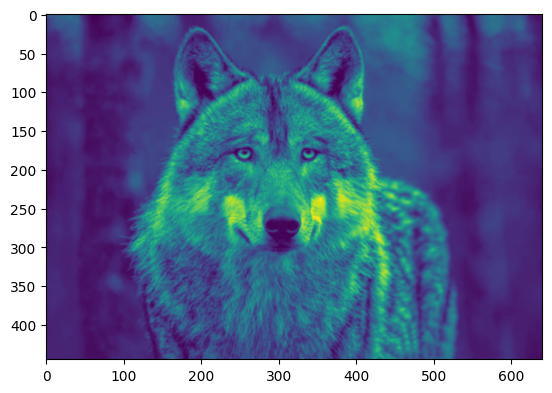

In [5]:
img = cv.imread('test.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3,3), 0)
plt.imshow(img)

### **4. Aplicando o Filtro de Sobel**
```python
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
sobelxy = cv.Sobel(img, cv.CV_64F, 1, 1, ksize=5)
```
O filtro de Sobel é usado para detectar bordas na imagem, realçando mudanças de intensidade (bordas):
- **`cv.Sobel`**:
  - **`img`**: A imagem de entrada.
  - **`cv.CV_64F`**: Especifica o formato dos valores calculados.
  - **`1, 0`**: Detecta bordas horizontais (variações no eixo X).
  - **`0, 1`**: Detecta bordas verticais (variações no eixo Y).
  - **`1, 1`**: Detecta bordas diagonais.
  - **`ksize=5`**: Define o tamanho do kernel (filtro) usado no cálculo.


In [6]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
sobelxy = cv.Sobel(img, cv.CV_64F, 1, 1, ksize=5)

### **5. Exibindo os Resultados**
```python
plt.figure(figsize=(18,19))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y')
plt.axis('off')

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
```
- **`plt.figure(figsize=(18,19))`**: Define o tamanho da figura onde os gráficos serão exibidos.
- **`plt.subplot`**: Divide a área de exibição em partes, permitindo mostrar várias imagens:
  - **`221`**: Posição 1 (original).
  - **`222`**: Posição 2 (Sobel X e Y combinados).
  - **`223`**: Posição 3 (Sobel X).
  - **`224`**: Posição 4 (Sobel Y).
- **`plt.imshow`**: Mostra a imagem em tons de cinza.
- **`cmap='gray'`**: Define a paleta de cores para tons de cinza.
- **`plt.title`**: Adiciona um título à imagem.
- **`plt.axis('off')`**: Remove os eixos para focar na imagem.


(-0.5, 639.5, 444.5, -0.5)

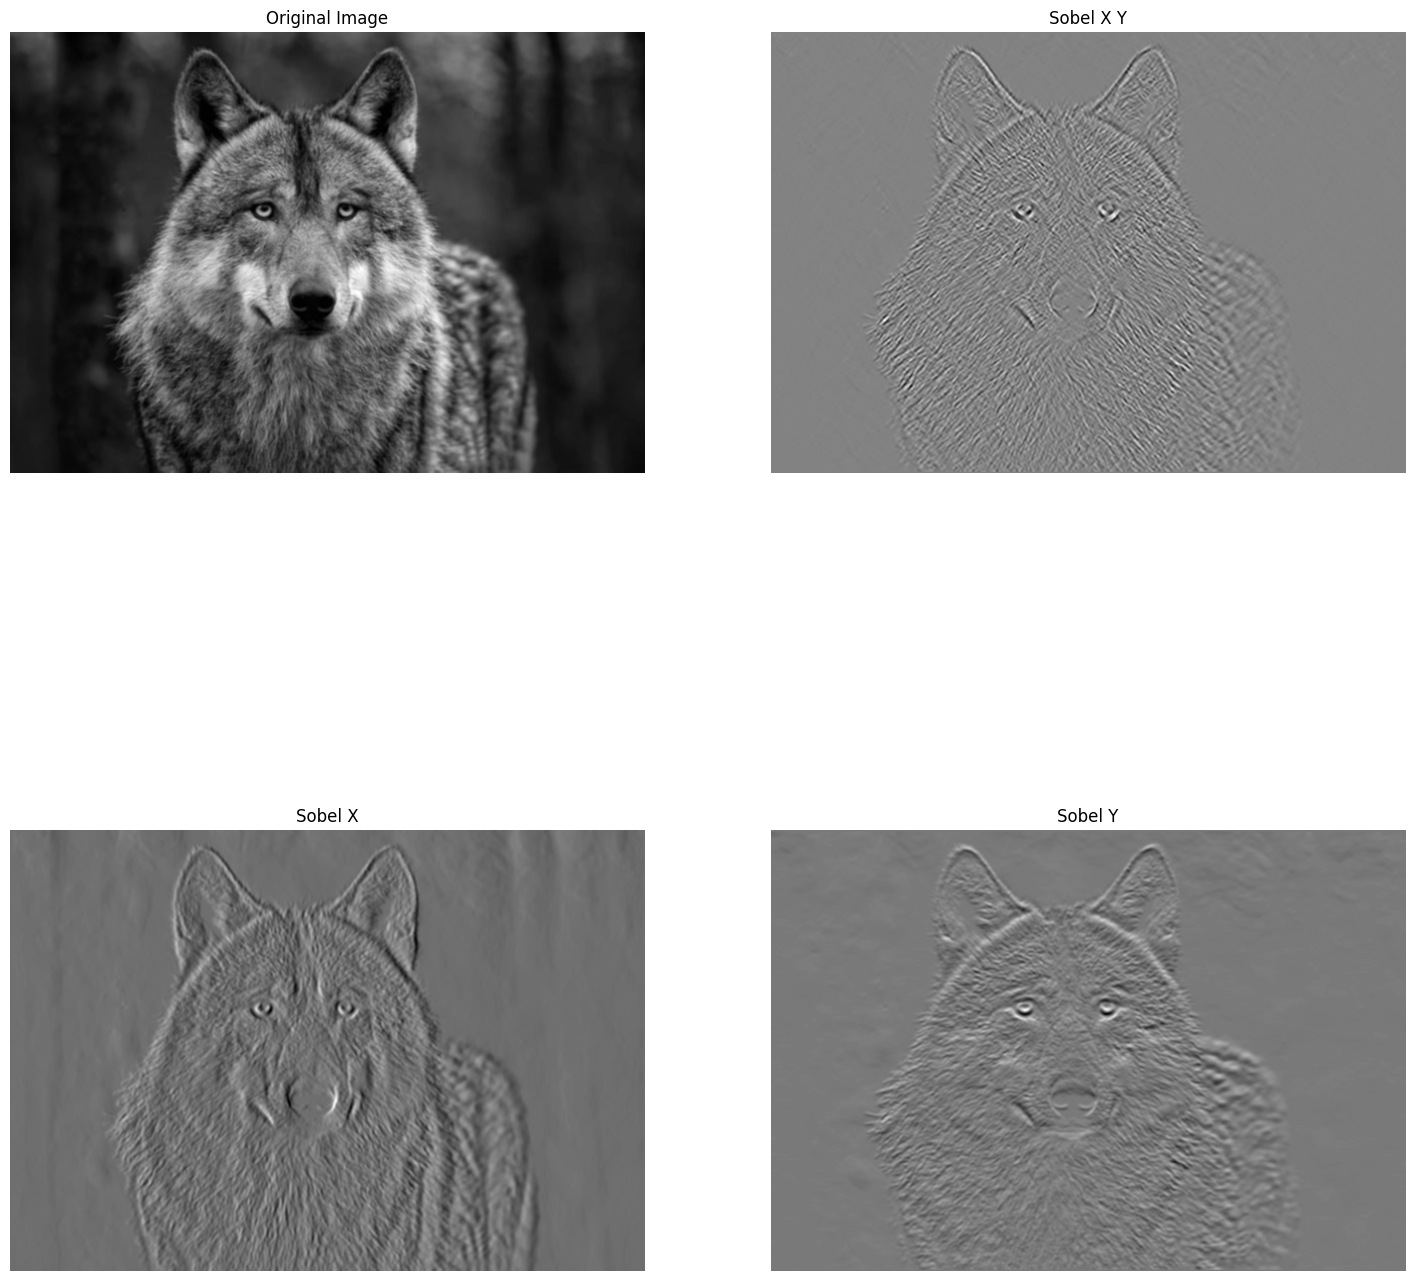

In [7]:
plt.figure(figsize=(18,19))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y')
plt.axis('off')

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

### **Resultado Esperado**
1. **Imagem Original Suavizada**: Após a conversão para tons de cinza e aplicação do desfoque.
2. **Sobel X e Y**: Bordas detectadas considerando mudanças em ambas as direções (diagonais).
3. **Sobel X**: Bordas horizontais.
4. **Sobel Y**: Bordas verticais.

### **Conclusão**
Este código demonstra como detectar bordas em uma imagem com o uso do filtro de Sobel. Isso é útil em diversas aplicações, como visão computacional, reconhecimento de objetos e análise de imagens.